In [1]:
%matplotlib inline
import pylab as plt
# plt.style.use('fivethirtyeight')

In [2]:
from animals import Herbivore, Island
import random

# Testing

In [3]:
A = Herbivore(10)

In [4]:
A.age

0

In [5]:
A._age()
A.age

1

In [6]:
random.seed(123)
A2 = A.breed()

In [7]:
A2.survival_skill

9

In [8]:
I = Island(initial_pop=10, max_pop=100)

In [9]:
len(I.animals)

10

In [10]:
stats = I.compute_epoches(15)

In [11]:
stats[14]

{'pop': 51,
 'mean_age': 1.8431372549019607,
 'mean_skill': 37.745098039215684,
 '75_skill': 0.21568627450980393}

In [12]:
I.animals[1].survival_skill

70

In [13]:
I2 = Island(initial_pop=10, max_pop=100)

In [14]:
I2.animals[1].survival_skill

60

# Thousand Islands

In [27]:
params = {'initial_pop':10, 'max_pop':40}
years, N_islands = 15, 1000

islands = [Island(**params) for _ in range(N_islands)]
stats = [ island.compute_epoches(years) for island in islands]

# Harsh Islands

In [28]:
from animals import HarshIsland

In [29]:
params = {'initial_pop':10, 'max_pop':40, 'env_range':[20,80]}
years, N_islands = 15, 1000

h_islands = [HarshIsland(**params) for _ in range(N_islands)]
h_stats = [ island.compute_epoches(years) for island in h_islands]

## Visualisation

In [43]:
datas = {"Heaven Islands":stats, 
        'Harsh Islands':h_stats}

colors = {
    'Heaven Islands': 'blue',
    'Harsh Islands': 'red'
}

In [44]:
# datas['Heaven Islands']

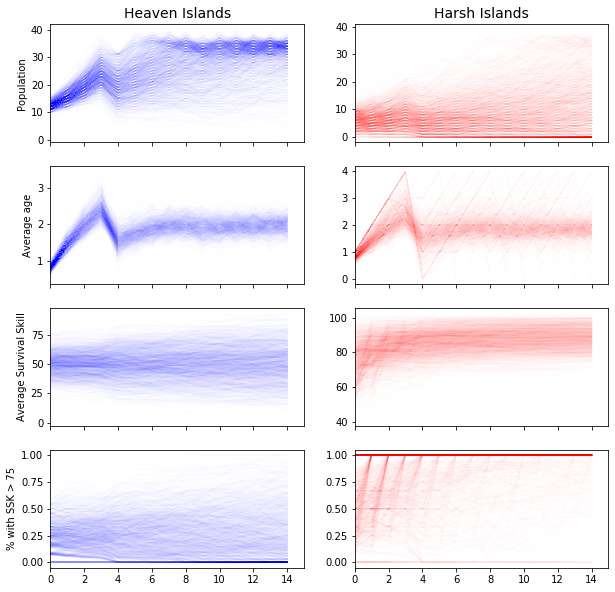

In [45]:
fig, axes = plt.subplots(4, 2, figsize=(10,10), sharex=True)


for i, title in enumerate(('Population', 'Average age', 'Average Survival Skill', '% with SSK > 75')):
    axes[i][0].set_ylabel(title)
    
    axes[i][0].set_xlim(0, 15)
    axes[i][1].set_xlim(0, 15)

for i, (k, v) in enumerate(datas.items()):
    axes[0][i].set_title(k, fontsize=14)
    
    for s in v: # for each island
        years = list(s.keys())
        
        axes[0][i].plot(years, [v['pop'] for v in s.values()], c=colors[k], label=k, alpha=.007)
        axes[1][i].plot(years, [v.get('mean_age', None) for v in s.values()], c=colors[k], label=k, alpha=.007)
        axes[2][i].plot(years, [v.get('mean_skill', None) for v in s.values()], c=colors[k], label=k, alpha=.007)
        axes[3][i].plot(years, [v.get('75_skill', None) for v in s.values()], c=colors[k], label=k, alpha=.007)
        